<class 'tuple'>
(52.3720278, 4.9167054)


C:\Users\quent\AppData\Local\Temp\ipykernel_6744\2834743016.py:9: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


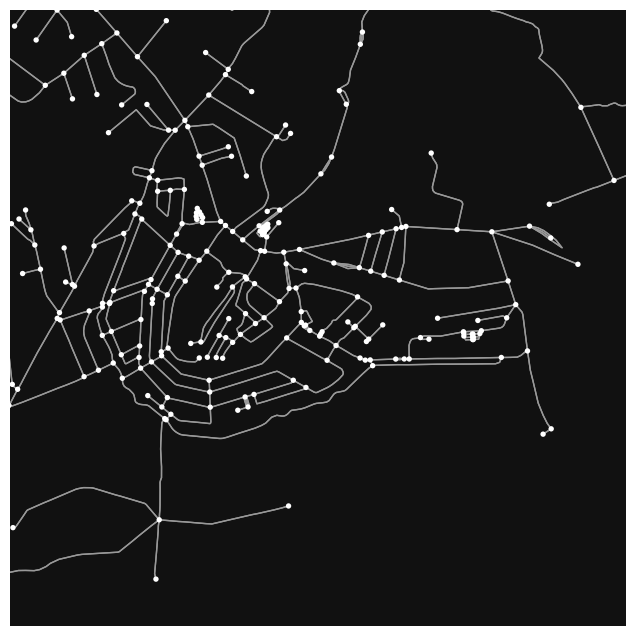

(323909108, 186.28435459978488) (60740843, 34.0606735846864)
Node found.
Node found.
[323909108, 324089287, 324827507, 305155548, 324817676, 324817669, 324128505, 324126395, 1195429031, 730950175, 277138134, 178261171, 60740843]


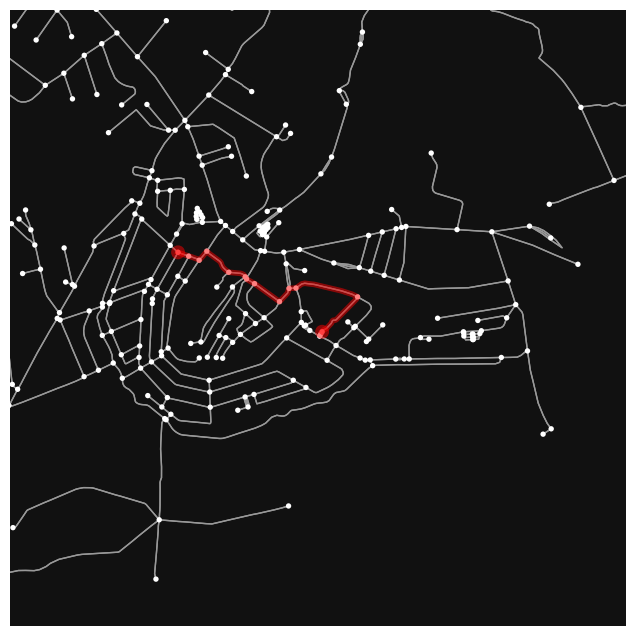

3441.556


In [4]:
import osmnx as ox
import networkx as nx
#Find coordinates of AMS
location_AMS = ox.geocode("Kattenburgerstraat 5, Amsterdam, Netherlands")
print(type(location_AMS))
print(location_AMS)

#This gets all the canal data from Amsterdam
ox.config(use_cache=True, log_console=True)
canals = ox.graph_from_place('Amsterdam', retain_all=False, truncate_by_edge=False,
                        simplify=True, custom_filter='["waterway"~"canal"]')

#Zoom in with AMS as center
bbox = ox.utils_geo.bbox_from_point(location_AMS, dist=4000)
fig, ax = ox.plot_graph(canals, bbox=bbox)

#And nearest node
nodes_AMS = ox.distance.nearest_nodes(canals, location_AMS[1], location_AMS[0], return_dist=True)
nodes_point2 = ox.distance.nearest_nodes(canals, 4.890435275112922, 52.37972256714931, return_dist=True)
print(nodes_AMS, nodes_point2)

#Check if nodes exist
if nodes_AMS[0] in canals.nodes:
    print("Node found.")
if nodes_point2[0] in canals.nodes:
    print("Node found.")

#Shortest path between the two points
path = ox.shortest_path(canals, nodes_AMS[0], nodes_point2[0])
print(path)

pt = ox.graph_to_gdfs(canals, edges=False).unary_union.centroid
fig, ax = ox.plot_graph_route(canals, path, bbox=bbox)

shortest_path = nx.shortest_path_length(canals, nodes_AMS[0], nodes_point2[0], weight='length')
print(shortest_path)
